In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sezioni trovate nel file:
- Distribution of 'name
- Distribution of 'value' for each 'name
- Distribution of 'Measure

DataFrame 'name':
                  key  COUNT
0               Model    208
1           # Params.    106
2             Dataset    131
3  Statistical Metric     54
4          Model Name     55


C:\Users\luca-\AppData\Local\Temp\ipykernel_14696\3589391849.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_names, x='key', y='COUNT', palette="viridis")


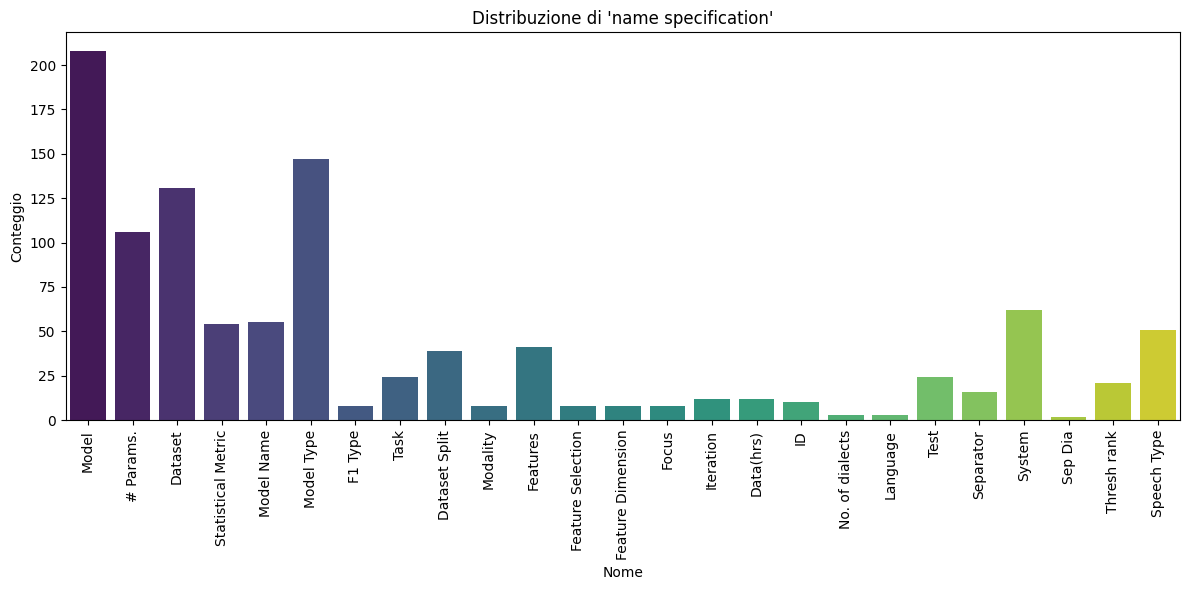

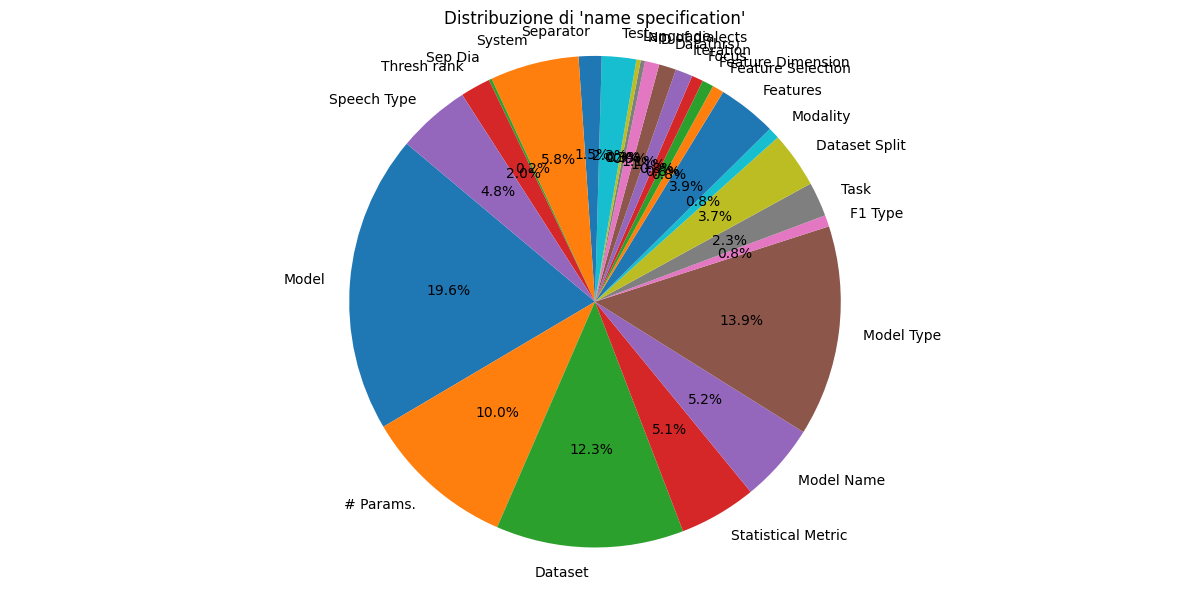


DataFrame 'Model':
                    value  COUNT
0        Full Fine-tuning      5
1                  BitFit      2
2                    LoRA     15
3       Residual Adapters     15
4  Linear Head HRA (ours)      6


C:\Users\luca-\AppData\Local\Temp\ipykernel_14696\3589391849.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_model, x='value', y='COUNT', palette="magma")


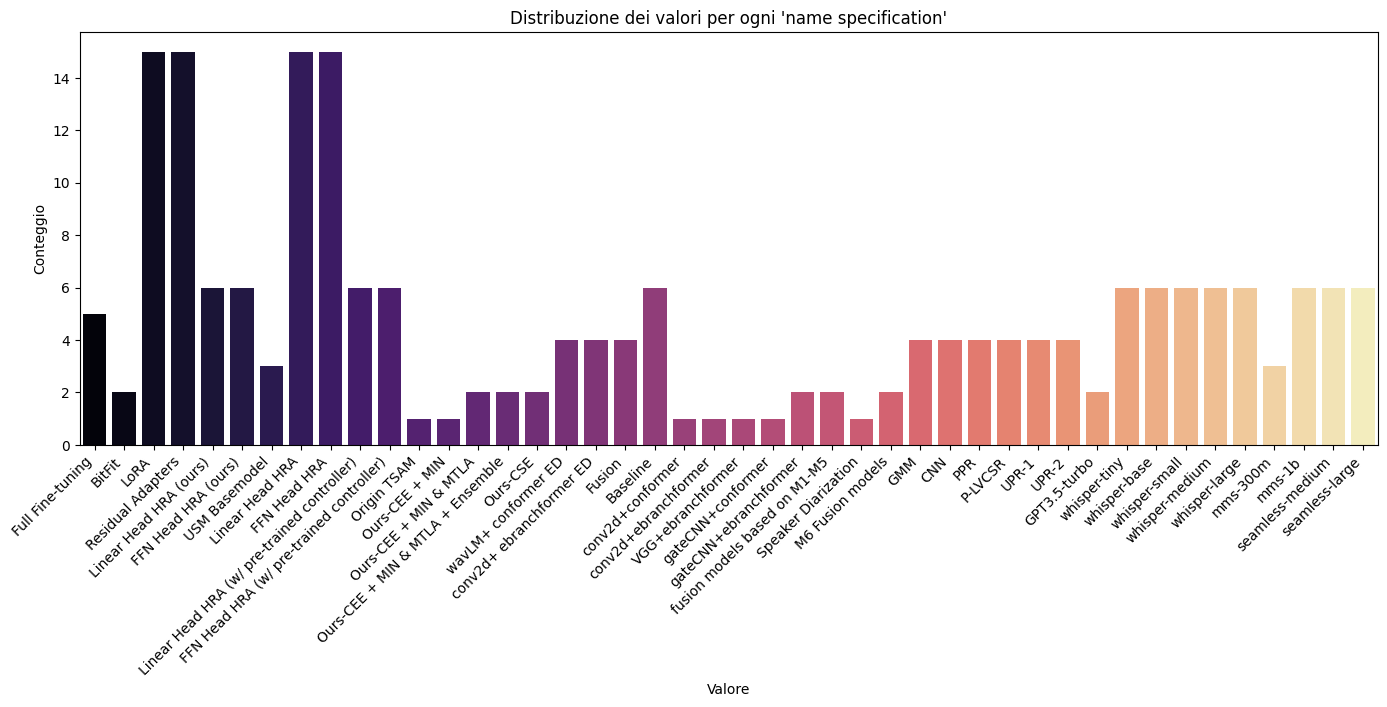


DataFrame 'Measure':
             key  COUNT
0            WER    164
1  Paired T-Test     12
2       F1 Score     51
3       Accuracy     45
4     # segments     15


C:\Users\luca-\AppData\Local\Temp\ipykernel_14696\3589391849.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_measure, x='key', y='COUNT', palette="coolwarm")


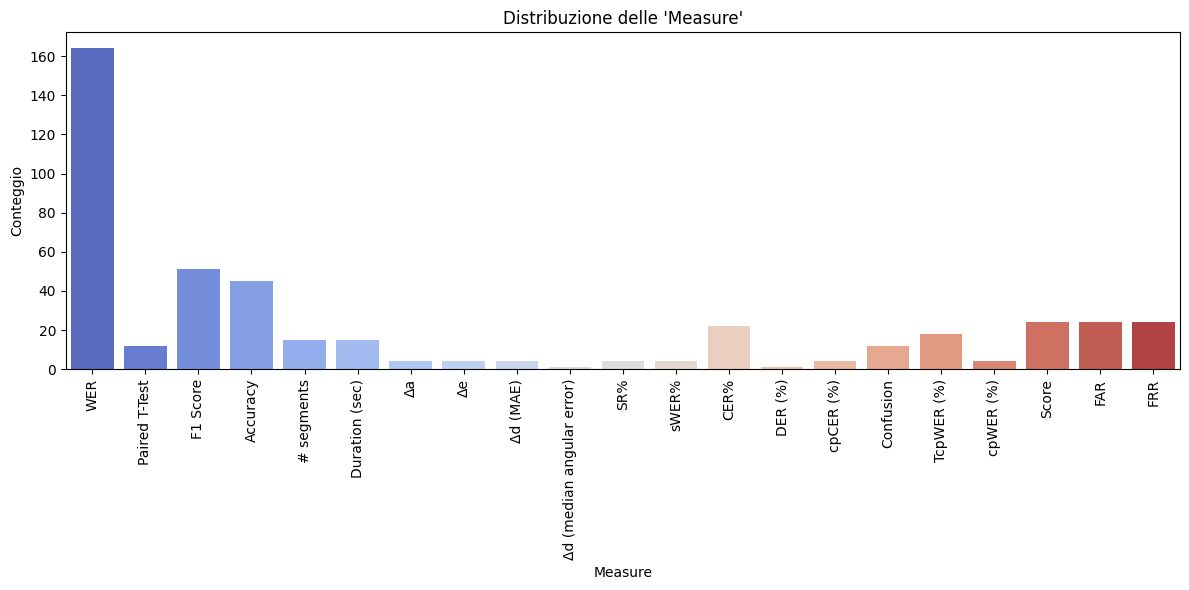

In [6]:


# --------------------------
# Funzioni per il parsing del file
# --------------------------
def parse_csv_sections(file_path):
    """
    Legge il file e suddivide le righe in sezioni in base ai delimitatori.
    I delimitatori sono linee che iniziano con "'--" e finiscono con "--;".
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    sections = {}
    current_section = None
    current_lines = []
    
    for line in lines:
        line = line.strip()
        if not line:
            continue  # salta righe vuote
        # Rileva una linea di sezione: inizia con "'--" e finisce con "--;"
        if line.startswith("'--") and line.endswith("--;"):
            # Salva la sezione precedente se esistente
            if current_section is not None and current_lines:
                sections[current_section] = current_lines
            # Estrae il nome della sezione:
            # Utilizziamo strip per rimuovere i caratteri ' , - , ; e spazi
            current_section = line.strip("'-; ").strip()
            current_lines = []
        else:
            current_lines.append(line)
    # Aggiungi l'ultima sezione
    if current_section is not None and current_lines:
        sections[current_section] = current_lines
    return sections

def parse_standard_section(lines):
    """
    Converte una sezione in un DataFrame, assumendo che ogni riga sia del tipo: campo1;campo2
    """
    data = [line.split(';') for line in lines if ';' in line]
    # Assumiamo che ogni riga contenga esattamente due campi
    df = pd.DataFrame(data, columns=['key', 'COUNT'])
    # Converti COUNT in numero se possibile
    df['COUNT'] = pd.to_numeric(df['COUNT'], errors='coerce')
    return df

def parse_value_sections(lines):
    """
    Effettua il parsing della sezione "Distribution of 'value' for each 'name'".
    La struttura è:
       (name) NomeDelCampo;
       Valore;Count
       Valore2;Count
       ...
    Ritorna un dizionario { nome: DataFrame }.
    """
    data = {}
    current_name = None
    for line in lines:
        # Se la riga inizia con "(name)" la interpretiamo come header per un nuovo gruppo
        if line.startswith("(name)"):
            # Esempio: "(name) Model;" -> estrai "Model"
            current_name = line.split("(name)")[1].strip().strip(';')
            data[current_name] = []
        else:
            # La riga dovrebbe essere nel formato "Valore;Count"
            parts = line.split(';')
            if len(parts) == 2 and current_name is not None:
                value, count = parts[0].strip(), parts[1].strip()
                data[current_name].append((value, count))
    # Converti ogni lista in un DataFrame
    for name, records in data.items():
        df = pd.DataFrame(records, columns=['value', 'COUNT'])
        df["COUNT"] = pd.to_numeric(df["COUNT"], errors='coerce')
        data[name] = df
    return data

# --------------------------
# Parsing del file CSV
# --------------------------
file_totale = "luca_borrelli_rainer_cabral_ilao_aligned_profiling.csv"
sections = parse_csv_sections(file_totale)

# Visualizza le chiavi delle sezioni trovate
print("Sezioni trovate nel file:")
for key in sections.keys():
    print("-", key)

# Le chiavi trovate nel file sono:
# - Distribution of 'name
# - Distribution of 'value' for each 'name
# - Distribution of 'Measure

# --------------------------
# 1. Distribuzione dei 'name'
# --------------------------
if "Distribution of 'name" in sections:
    df_names = parse_standard_section(sections["Distribution of 'name"])
else:
    print("Non è stata trovata la sezione 'Distribution of 'name'")
    df_names = None

if df_names is not None:
    print("\nDataFrame 'name':")
    print(df_names.head())

    # Grafico a barre per la distribuzione dei 'name'
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_names, x='key', y='COUNT', palette="viridis")
    plt.xticks(rotation=90)
    plt.title("Distribuzione di 'name specification'")
    plt.xlabel("Nome")
    plt.ylabel("Conteggio")
    plt.tight_layout()
    plt.show()

# Grafico a torta sempre dlela stessa cosa
    plt.figure(figsize=(12,6))
    plt.pie(df_names['COUNT'], labels=df_names['key'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equalizza gli assi per ottenere un cerchio
    plt.title("Distribuzione di 'name specification'")
    plt.tight_layout()  # Ottimizza il layout per evitare sovrapposizioni
    plt.show()

# --------------------------
# 2. Distribuzione dei 'value' per ciascun 'name'
# --------------------------
if "Distribution of 'value' for each 'name" in sections:
    value_sections = parse_value_sections(sections["Distribution of 'value' for each 'name"])
else:
    print("Non è stata trovata la sezione 'Distribution of 'value' for each 'name'")
    value_sections = {}

if "Model" in value_sections:
    df_model = value_sections["Model"]
    print("\nDataFrame 'Model':")
    print(df_model.head())
    
    plt.figure(figsize=(14,6))  # Aumenta la larghezza della figura
    ax = sns.barplot(data=df_model, x='value', y='COUNT', palette="magma")
    plt.xticks(rotation=45, ha='right')  # Ruota le etichette e allineale a destra
    plt.title("Distribuzione dei valori per ogni 'name specification'")
    plt.xlabel("Valore")
    plt.ylabel("Conteggio")
    plt.tight_layout()  # Ottimizza il layout
    plt.subplots_adjust(bottom=0.25)  # Aggiusta il margine inferiore se necessario
    plt.show()
else:
    print("Non è stato trovato il gruppo per 'Model' nella sezione dei valori.")


# --------------------------
# 3. Distribuzione delle 'Measure'
# --------------------------
if "Distribution of 'Measure" in sections:
    df_measure = parse_standard_section(sections["Distribution of 'Measure"])
else:
    print("Non è stata trovata la sezione 'Distribution of 'Measure'")
    df_measure = None

if df_measure is not None:
    print("\nDataFrame 'Measure':")
    print(df_measure.head())
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_measure, x='key', y='COUNT', palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title("Distribuzione delle 'Measure'")
    plt.xlabel("Measure")
    plt.ylabel("Conteggio")
    plt.tight_layout()
    plt.show()


---
## Analisi per PAPER


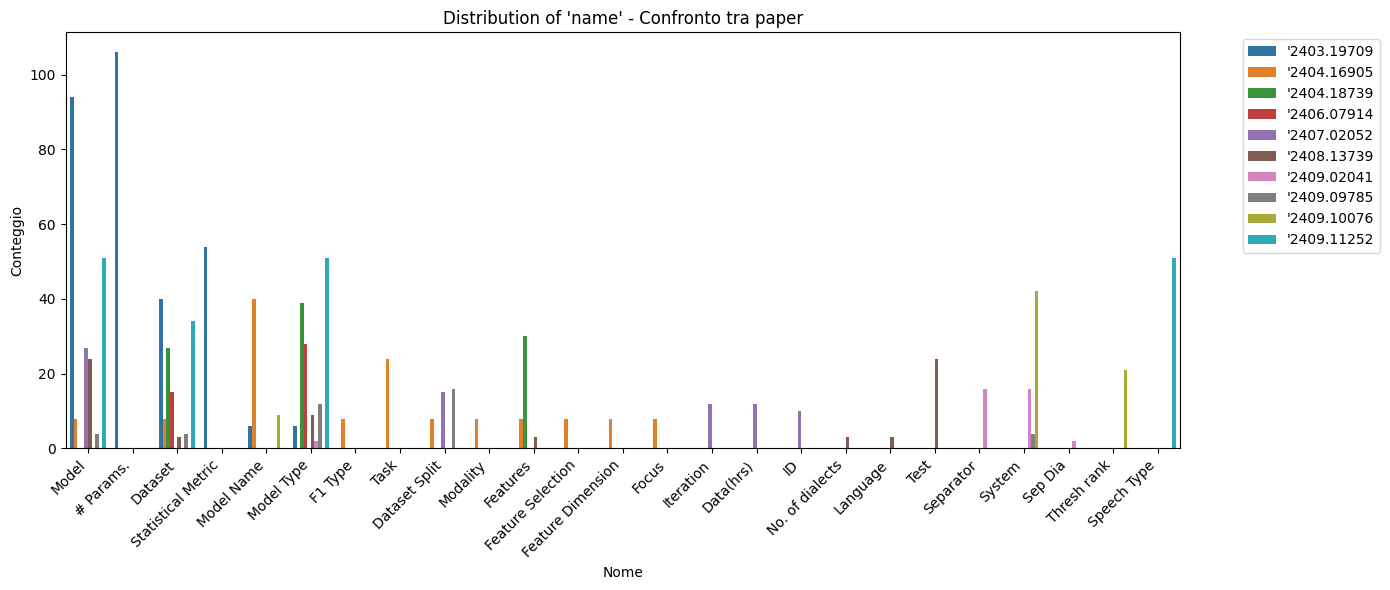

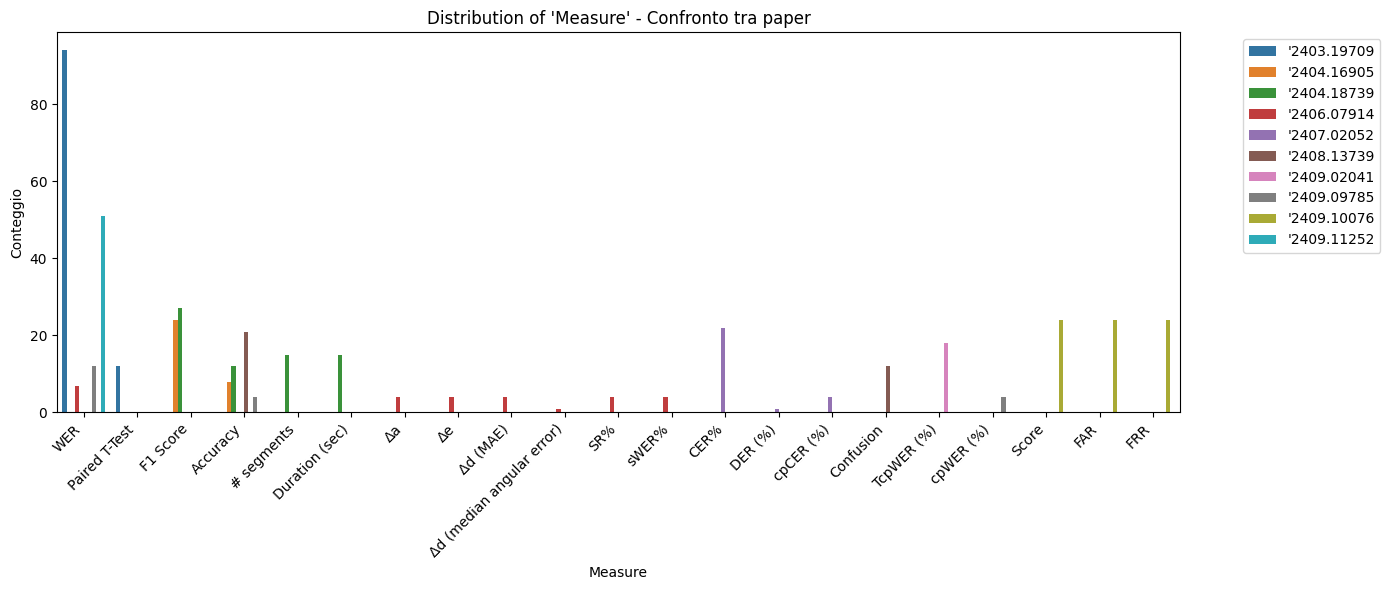

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# -----------------------------------------------------------------
# 1. Parsing del file in modo da raggruppare i dati per sezioni e paper
# -----------------------------------------------------------------
def parse_csv_per_paper(file_path):
    """
    Legge il file CSV e suddivide le righe in un dizionario
    con struttura: papers_sections[paper_id][section_name] = [righe].
    
    Formato tipico di riga:
       '-- Distribution of 'name' --;;'2403.19709
        Model;94;'2403.19709
        ...
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    papers_sections = {}
    current_paper = None
    current_section = None
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
        
        parts = line.split(';')
        if len(parts) < 3:
            # Se non ci sono almeno 3 campi (key, COUNT, PAPER) saltiamo
            continue
        
        first_field = parts[0].strip()  # Es. "'-- Distribution of 'name' --"
        paper_id = parts[-1].strip()    # L'ultimo campo è il PAPER
        
        # Se la riga è un delimitatore di sezione
        if first_field.startswith("'--") and first_field.endswith("--"):
            current_paper = paper_id
            section_name = first_field.strip("'").strip("-").strip()
            
            if current_paper not in papers_sections:
                papers_sections[current_paper] = {}
            if section_name not in papers_sections[current_paper]:
                papers_sections[current_paper][section_name] = []
            
            current_section = section_name
        else:
            # Riga di contenuto
            if current_paper and current_section:
                papers_sections[current_paper][current_section].append(line)
    
    return papers_sections

# Funzioni per parsare i formati delle sezioni
def parse_standard_section(lines, paper_id):
    """
    Ogni riga è nel formato: key;COUNT;paper
    Ritorna un DataFrame con [paper, key, COUNT].
    """
    data = []
    for line in lines:
        parts = line.split(';')
        if len(parts) >= 3:
            key = parts[0].strip()
            count = parts[1].strip()
            p_id = parts[2].strip()
            data.append((p_id, key, count))
    df = pd.DataFrame(data, columns=['paper', 'key', 'COUNT'])
    df['COUNT'] = pd.to_numeric(df['COUNT'], errors='coerce')
    return df

def parse_value_section(lines, paper_id):
    """
    Sezione "Distribution of 'value' for each 'name'":
      (name) NomeDelCampo;;PAPER
      Valore;Count;PAPER
      ...
    Ritorna una lista di tuple (paper, group_name, value, COUNT).
    """
    data = []
    current_name = None
    for line in lines:
        parts = line.split(';')
        if len(parts) < 3:
            continue
        # parts[0], parts[1], parts[2] = PAPER
        if parts[0].startswith("(name)"):
            current_name = parts[0].replace("(name)", "").strip()
        else:
            if current_name:
                value = parts[0].strip()
                count = parts[1].strip()
                p_id = parts[2].strip()
                data.append((p_id, current_name, value, count))
    return data

# -----------------------------------------------------------------
# 2. Creazione di DataFrame aggregati per TUTTI i paper
# -----------------------------------------------------------------
def crea_dataframe_unificati(papers_sections):
    """
    Ritorna tre DataFrame:
      1) df_names_completo: aggregato di TUTTE le "Distribution of 'name'"
      2) df_measure_completo: aggregato di TUTTE le "Distribution of 'Measure'"
      3) df_values_completo: aggregato di TUTTE le "Distribution of 'value' for each 'name'"
         (struttura: [paper, group_name, value, COUNT])
    """
    df_names_list = []
    df_measure_list = []
    df_values_list = []
    
    for paper_id, sections_dict in papers_sections.items():
        for section_name, lines in sections_dict.items():
            
            # 1) Distribution of 'name'
            if "Distribution of 'name'" in section_name:
                df_temp = parse_standard_section(lines, paper_id)
                df_names_list.append(df_temp)
            
            # 2) Distribution of 'Measure'
            elif "Distribution of 'Measure'" in section_name:
                df_temp = parse_standard_section(lines, paper_id)
                df_measure_list.append(df_temp)
            
            # 3) Distribution of 'value' for each 'name'
            elif "Distribution of 'value' for each 'name'" in section_name:
                vals = parse_value_section(lines, paper_id)
                df_values_list.extend(vals)
    
    # Concatenazione
    if df_names_list:
        df_names_completo = pd.concat(df_names_list, ignore_index=True)
    else:
        df_names_completo = pd.DataFrame(columns=['paper','key','COUNT'])
    
    if df_measure_list:
        df_measure_completo = pd.concat(df_measure_list, ignore_index=True)
    else:
        df_measure_completo = pd.DataFrame(columns=['paper','key','COUNT'])
    
    if df_values_list:
        df_values_completo = pd.DataFrame(df_values_list, columns=['paper','group_name','value','COUNT'])
        df_values_completo['COUNT'] = pd.to_numeric(df_values_completo['COUNT'], errors='coerce')
    else:
        df_values_completo = pd.DataFrame(columns=['paper','group_name','value','COUNT'])
    
    return df_names_completo, df_measure_completo, df_values_completo

# -----------------------------------------------------------------
# 3. Creazione di (pochi) grafici "fusi" per vedere differenze tra paper
# -----------------------------------------------------------------
def plot_fused_names(df_names):
    """
    Un unico barplot che confronta i 'name' (asse x) e la COUNT (asse y), con hue=paper.
    """
    if df_names.empty:
        print("Nessun dato in df_names.")
        return
    
    plt.figure(figsize=(12,6))
    # Se i 'key' sono tanti, potrebbe risultare affollato:
    sns.barplot(data=df_names, x='key', y='COUNT', hue='paper', dodge=True)
    plt.xticks(rotation=45, ha='right')
    plt.title("Distribution of 'name' - Confronto tra paper")
    plt.xlabel("Nome")
    plt.ylabel("Conteggio")
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def plot_fused_measures(df_measure):
    """
    Un unico barplot che confronta le 'Measure' (asse x) e la COUNT (asse y), con hue=paper.
    """
    if df_measure.empty:
        print("Nessun dato in df_measure.")
        return
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_measure, x='key', y='COUNT', hue='paper', dodge=True)
    plt.xticks(rotation=45, ha='right')
    plt.title("Distribution of 'Measure' - Confronto tra paper")
    plt.xlabel("Measure")
    plt.ylabel("Conteggio")
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# -----------------------------------------------------------------
# 4. Main script
# -----------------------------------------------------------------
def main():
    file_csv = "luca_borrelli_rainer_cabral_ilao_aligned_profiling_by_paper.csv"
    papers_sections = parse_csv_per_paper(file_csv)

    # Crea DataFrame unificati
    df_names, df_measures, df_values = crea_dataframe_unificati(papers_sections)
    
    # Plot "fusi" (pochi grafici) per confrontare i vari paper
    plot_fused_names(df_names)
    plot_fused_measures(df_measures)

if __name__ == "__main__":
    main()


---
## Per singola Tabella

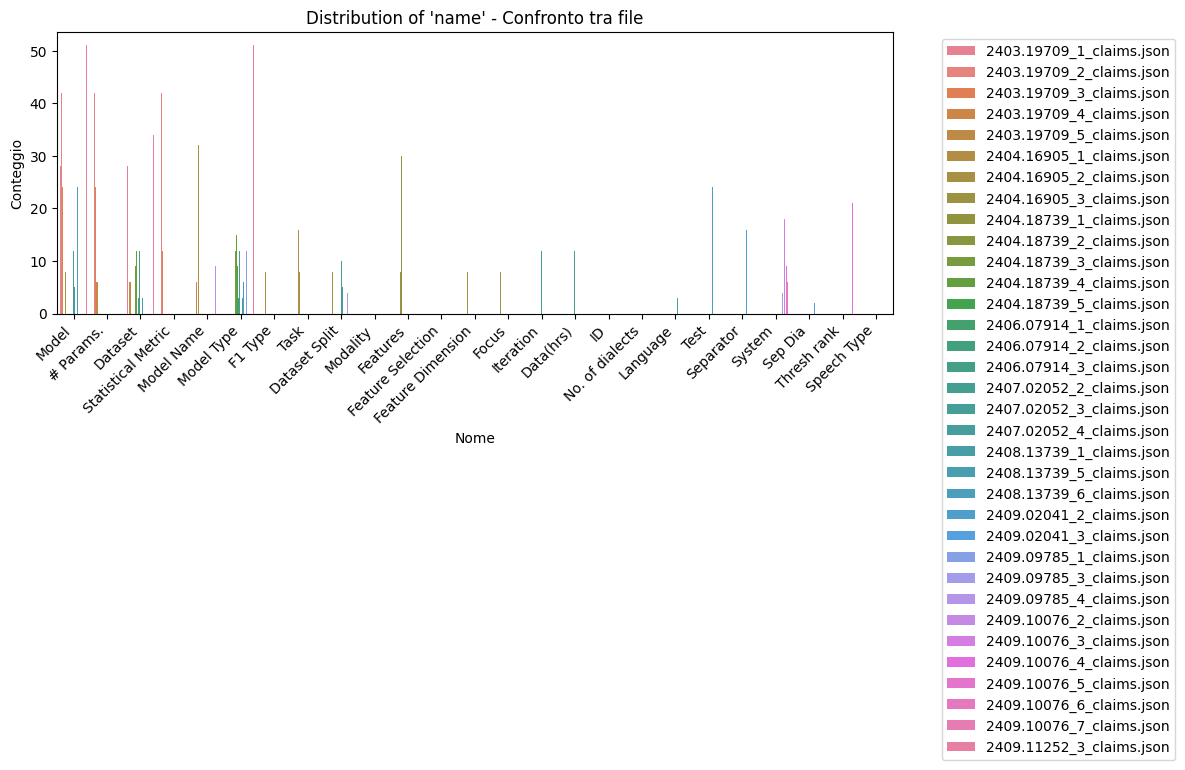

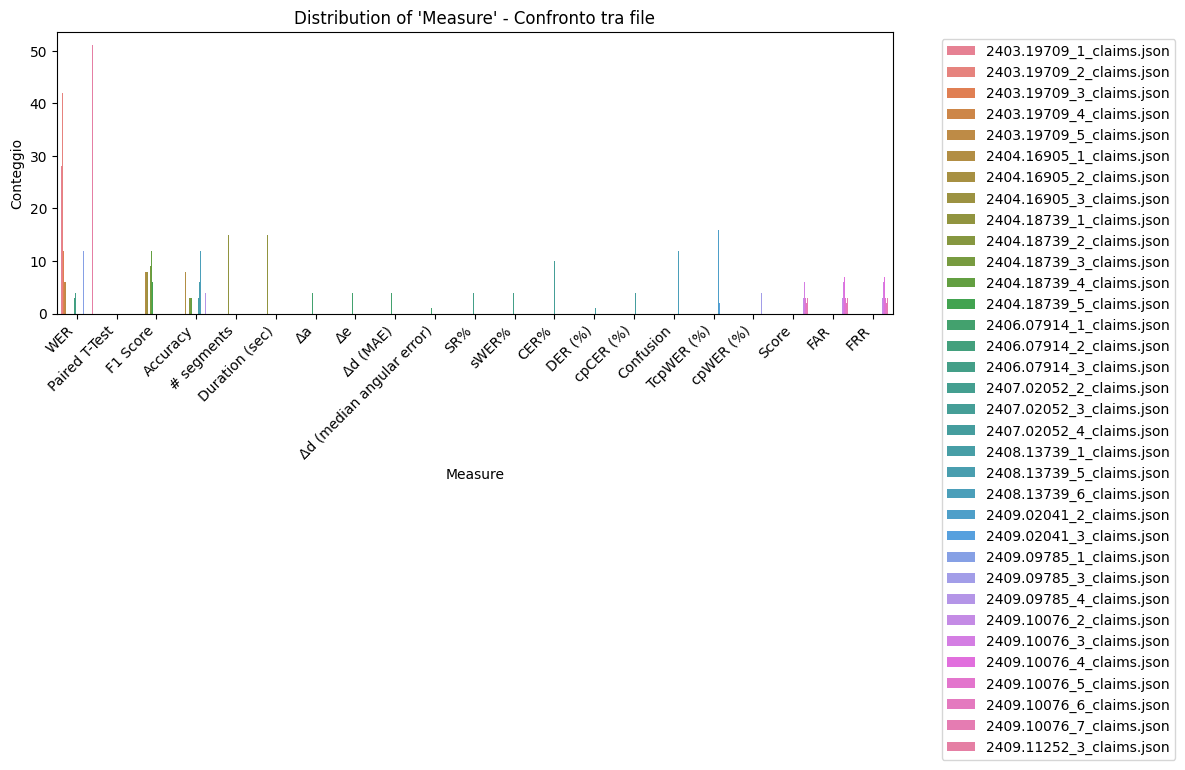

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# -----------------------------------------------------------------
# 1. Parsing del file per sezioni e filename
# -----------------------------------------------------------------
def parse_csv_per_file(file_path):
    """
    Legge il CSV e suddivide le righe in un dizionario con struttura:
       files_sections[filename][section_name] = [righe]

    Formato di una riga tipica:
      '-- Distribution of 'name' --;;2403.19709_1_claims.json
       Model;28;2403.19709_1_claims.json
       ...
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    files_sections = {}
    current_filename = None
    current_section = None
    
    for line in lines:
        line = line.strip()
        if not line:
            continue
        
        parts = line.split(';')
        if len(parts) < 3:
            # Se non ci sono almeno KEY, COUNT, FILENAME
            continue
        
        first_field = parts[0].strip()      # es. "'-- Distribution of 'name' --"
        filename = parts[-1].strip()       # l'ultimo campo è FILENAME
        
        # Se la riga è un delimitatore di sezione
        if first_field.startswith("'--") and first_field.endswith("--"):
            # Esempio: "'-- Distribution of 'name' --"
            current_filename = filename
            # Togli virgolette e trattini al name
            section_name = first_field.strip("'").strip("-").strip()
            
            if current_filename not in files_sections:
                files_sections[current_filename] = {}
            if section_name not in files_sections[current_filename]:
                files_sections[current_filename][section_name] = []
            
            current_section = section_name
        else:
            # Riga di contenuto (chiave; conteggio; filename)
            if current_filename and current_section:
                files_sections[current_filename][current_section].append(line)
    
    return files_sections

# -----------------------------------------------------------------
# 2. Funzioni di parsing per le sezioni
# -----------------------------------------------------------------
def parse_standard_section(lines):
    """
    Ogni riga: KEY;COUNT;FILENAME
    Restituisce un DataFrame con colonne [filename, key, COUNT].
    """
    data = []
    for line in lines:
        parts = line.split(';')
        if len(parts) >= 3:
            key = parts[0].strip()
            count = parts[1].strip()
            filename = parts[2].strip()
            data.append((filename, key, count))
    df = pd.DataFrame(data, columns=['filename', 'key', 'COUNT'])
    df['COUNT'] = pd.to_numeric(df['COUNT'], errors='coerce')
    return df

def parse_value_section(lines):
    """
    Sezione: "Distribution of 'value' for each 'name'"
      (name) NomeDelCampo;;FILENAME
      Valore;Count;FILENAME
      ...
    Restituisce una lista di tuple (filename, group_name, value, COUNT).
    """
    data = []
    current_name = None
    for line in lines:
        parts = line.split(';')
        if len(parts) < 3:
            continue
        
        if parts[0].startswith("(name)"):
            current_name = parts[0].replace("(name)", "").strip()
        else:
            # Valore, Count, FILENAME
            if current_name:
                value = parts[0].strip()
                count = parts[1].strip()
                filename = parts[2].strip()
                data.append((filename, current_name, value, count))
    return data

# -----------------------------------------------------------------
# 3. Creazione di DataFrame unificati per TUTTI i filename
# -----------------------------------------------------------------
def crea_dataframe_unificati(files_sections):
    """
    Restituisce tre DataFrame 'fusi':
      1) df_names_completo -> per "Distribution of 'name'"
      2) df_measure_completo -> per "Distribution of 'Measure'"
      3) df_values_completo -> per "Distribution of 'value' for each 'name'"
    """
    df_names_list = []
    df_measure_list = []
    df_values_list = []
    
    for filename, sections_dict in files_sections.items():
        for section_name, lines in sections_dict.items():
            # 1) Distribution of 'name'
            if "Distribution of 'name'" in section_name:
                df_temp = parse_standard_section(lines)
                df_names_list.append(df_temp)
            
            # 2) Distribution of 'Measure'
            elif "Distribution of 'Measure'" in section_name:
                df_temp = parse_standard_section(lines)
                df_measure_list.append(df_temp)
            
            # 3) Distribution of 'value' for each 'name'
            elif "Distribution of 'value' for each 'name'" in section_name:
                vals = parse_value_section(lines)
                df_values_list.extend(vals)
    
    # Concateniamo se abbiamo dati
    if df_names_list:
        df_names_completo = pd.concat(df_names_list, ignore_index=True)
    else:
        df_names_completo = pd.DataFrame(columns=['filename','key','COUNT'])
    
    if df_measure_list:
        df_measure_completo = pd.concat(df_measure_list, ignore_index=True)
    else:
        df_measure_completo = pd.DataFrame(columns=['filename','key','COUNT'])
    
    if df_values_list:
        df_values_completo = pd.DataFrame(df_values_list, columns=['filename','group_name','value','COUNT'])
        df_values_completo['COUNT'] = pd.to_numeric(df_values_completo['COUNT'], errors='coerce')
    else:
        df_values_completo = pd.DataFrame(columns=['filename','group_name','value','COUNT'])
    
    return df_names_completo, df_measure_completo, df_values_completo

# -----------------------------------------------------------------
# 4. Creazione di POCHI grafici "globali" per confrontare i vari FILENAME
# -----------------------------------------------------------------
def plot_fused_names(df_names):
    """
    Un barplot che confronta i 'name' (asse x) e la COUNT (asse y), con hue=filename.
    """
    if df_names.empty:
        print("Nessun dato in df_names.")
        return
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_names, x='key', y='COUNT', hue='filename', dodge=True)
    plt.xticks(rotation=45, ha='right')
    plt.title("Distribution of 'name' - Confronto tra file")
    plt.xlabel("Nome")
    plt.ylabel("Conteggio")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_fused_measures(df_measure):
    """
    Un barplot che confronta le 'Measure' (asse x) e la COUNT (asse y), con hue=filename.
    """
    if df_measure.empty:
        print("Nessun dato in df_measure.")
        return
    
    plt.figure(figsize=(12,6))
    sns.barplot(data=df_measure, x='key', y='COUNT', hue='filename', dodge=True)
    plt.xticks(rotation=45, ha='right')
    plt.title("Distribution of 'Measure' - Confronto tra file")
    plt.xlabel("Measure")
    plt.ylabel("Conteggio")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------
# 5. Main script
# -----------------------------------------------------------------
def main():
    file_csv = "luca_borrelli_rainer_cabral_ilao_aligned_profiling_by_file.csv"  # Il tuo CSV
    files_sections = parse_csv_per_file(file_csv)
    
    # Creiamo i DataFrame unificati
    df_names, df_measures, df_values = crea_dataframe_unificati(files_sections)
    
    # Grafici globali
    plot_fused_names(df_names)
    plot_fused_measures(df_measures)

if __name__ == "__main__":
    main()
